# Word Counter Data Analysis

**Basic data analysis and data visualization of your WordCounter Writings History and Word Count Stats**.

NOTE: In order to use this code you'll need to first collect, extract and parse your word counter history by running [wordcounter_collector.ipynb](https://github.com/markwk/qs_ledger/tree/master/wordcounter/WordCounter_collector.ipynb)

For additional Mac integration and reports checkout, [Alfred Integration for Word Counter App](https://github.com/markwk/alfred-workflow-wordcounterapp)

------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_wordcounter = pd.read_csv("data/wordcounter_hourly.csv")

In [3]:
df_wordcounter['date'] = pd.to_datetime(df_wordcounter['date'])
df_wordcounter['mo_num'] = df_wordcounter['date'].dt.month

----

## Full Data Analysis

### Yearly Breakdown

In [4]:
year_counts = df_wordcounter.groupby(['year'])['count'].sum().sort_index()
year_counts

year
2016     60040
2017    391760
2018    491927
Name: count, dtype: int64

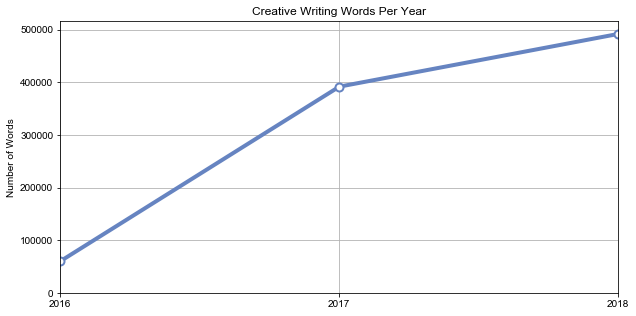

In [5]:
dataset = year_counts
chart_title = 'Creative Writing Words Per Year'

ax = dataset.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.set_xlim((dataset.index[0], dataset.index[-1]))

max = dataset.max() + (dataset.max()*0.05)

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_ylim(0, max)
ax.set_xticks(dataset.index)
ax.set_ylabel('Number of Words')
ax.set_xlabel('')
ax.set_title(chart_title)
plt.style.use('seaborn-darkgrid')
plt.show()

### Monthly

In [6]:
monthly_counts = df_wordcounter.groupby(['month'])['count'].sum().sort_index()
monthly_counts.tail(10)

month
2018-03    47785
2018-04    52209
2018-05    39491
2018-06    27204
2018-07    26021
2018-08    23417
2018-09    42015
2018-10    29658
2018-11    73363
2018-12    66219
Name: count, dtype: int64

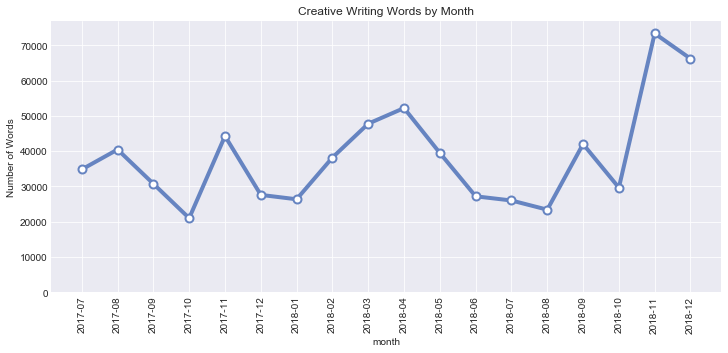

In [7]:
dataset = monthly_counts.tail(18)
chart_title = 'Creative Writing Words by Month'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
max = dataset.max() + (dataset.max()*0.05)
ax.set_ylim(0, max)
ax.set_xticks(index)
ax.set_ylabel('Number of Words')
# ax.set_xlabel('')
plt.xticks(index, dataset.index, rotation=90)
ax.set_title(chart_title)
plt.style.use('seaborn-darkgrid')
plt.show()

### Date

In [8]:
daily_counts = df_wordcounter.groupby(['date'])['count'].sum()
daily_counts = daily_counts.to_frame().reset_index()
daily_counts['date'] = pd.to_datetime(daily_counts['date'])
daily_counts = daily_counts.set_index('date')

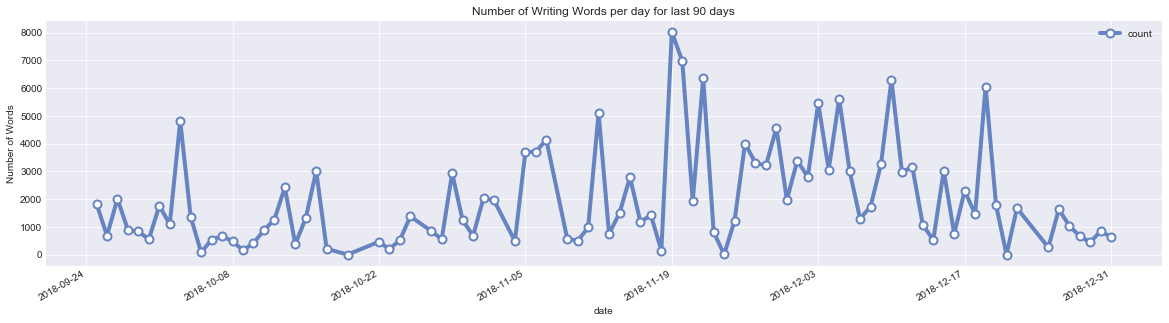

In [9]:
dataset = daily_counts.tail(90)
chart_title = 'Number of Writing Words per day for last 90 days'

ax = dataset.plot(kind='line', figsize=[20, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.set_ylabel('Number of Words')
ax.set_title(chart_title)

plt.show()

### Day of Week

In [10]:
daily_counts = df_wordcounter.groupby(['date'])['count'].sum()
daily_counts = daily_counts.to_frame().reset_index()
daily_counts['date'] = pd.to_datetime(daily_counts['date'])
daily_counts['dow'] = daily_counts['date'].dt.weekday

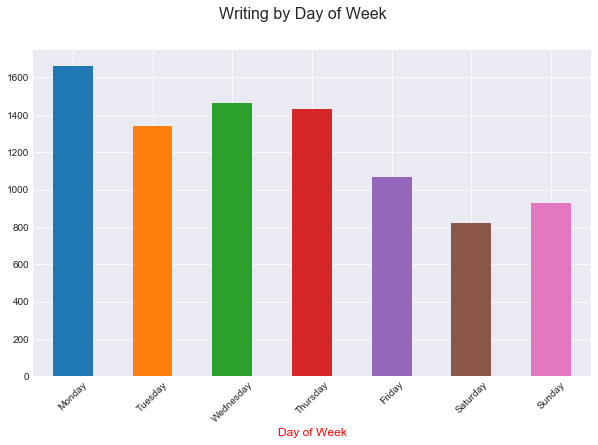

In [11]:
data = daily_counts.groupby(['dow'])['count'].mean()

fig, ax = plt.subplots(figsize=[10, 6])
ax = data.plot(kind='bar', x='day_of_week')

n_groups = len(data)
index = np.arange(n_groups)
opacity = 0.5

ax.yaxis.grid(True)

plt.suptitle('Writing by Day of Week', fontsize=16)
dow_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(index, dow_labels, rotation=45)
plt.style.use('seaborn-darkgrid')
plt.xlabel('Day of Week', fontsize=12, color='red')

### Hour of Day

In [12]:
dates_hourly = df_wordcounter.groupby(['date', 'hour'])['count'].sum()
dates_hourly = dates_hourly.to_frame().reset_index()

In [13]:
hour_counts = round(dates_hourly.groupby(['hour'])['count'].mean(), 1)

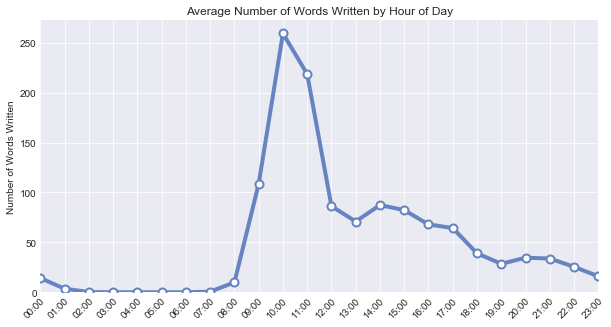

In [14]:
ax = hour_counts.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

xlabels = hour_counts.index.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

ax.set_xlim((hour_counts.index[0], hour_counts.index[-1]))

ax.yaxis.grid(True)
max = hour_counts.max() + (hour_counts.max()*0.05)
ax.set_ylim((0, max))
ax.set_ylabel('Number of Words Written')
ax.set_xlabel('')
ax.set_title('Average Number of Words Written by Hour of Day')
plt.style.use('seaborn-darkgrid')
plt.show()

-----

# Target Year Data Analysis and Year-in-Review Report

In [15]:
target_year = 2018
data = df_wordcounter[df_wordcounter['year'] == target_year]

### Favorite Writing App

In [16]:
app_usage = data.groupby(['app'])['count'].sum().sort_values(ascending=False)

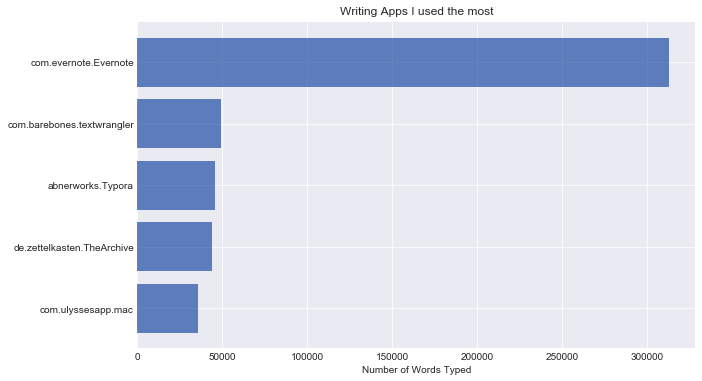

In [17]:
ax = app_usage.sort_values(ascending=True).tail(5).plot(kind='barh', figsize=[10, 6], width=0.8, alpha=0.6, 
                                    color='#003399', edgecolor=None, zorder=2)
ax.xaxis.grid(True)
ax.set_xlabel('Number of Words Typed')
ax.set_ylabel('')
ax.set_title('Writing Apps I used the most', y=1.005)

plt.show()

In [18]:
# breakdown of app usage by month
monthly_app_usage = data.groupby(['mo_num', 'app'])['count'].sum()
monthly_app_usage = monthly_app_usage.to_frame().sort_values(by='mo_num')
monthly_app_usage.reset_index(inplace=True)  

In [19]:
# Generate a Special Data Frame to Track App Usage Changes
monthly_top_app_stats = pd.DataFrame(columns=['month','app', 'count'])
for app in app_usage.head(5).index:
    for m in data.mo_num.unique():
        try:
            total = monthly_app_usage[(monthly_app_usage['app'] == app) & (monthly_app_usage['mo_num'] == m)].iloc[0]['count']
        except:
            total = 0
        monthly_top_app_stats = monthly_top_app_stats.append({
            'month' : m, 
            'app' : app,
            'count': total
            } , ignore_index=True)      

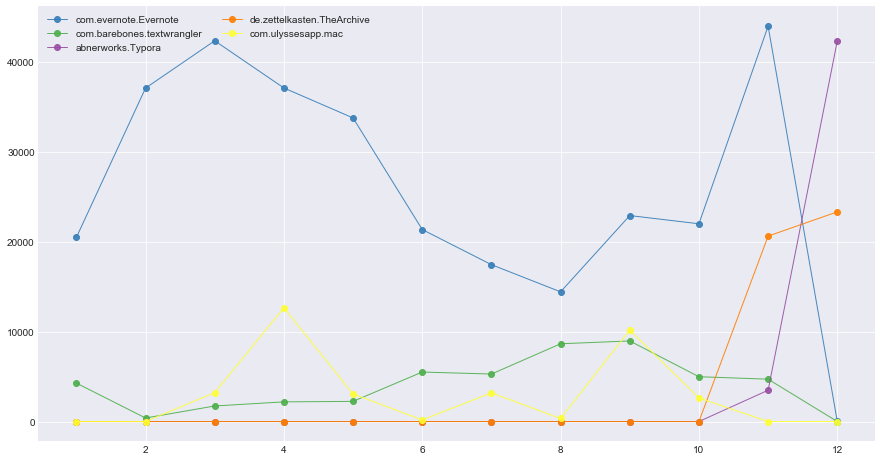

In [20]:
# Plot App Usage Changes by Month

# create a color palette
palette = plt.get_cmap('Set1')

plt.figure(figsize=(15,8)) 

# multiple line plot
num=0
for app in monthly_top_app_stats['app'].unique():
    num+=1
    # print(app)
    plt.plot(monthly_top_app_stats[(monthly_top_app_stats['app'] == app)]['month'], 
             monthly_top_app_stats[(monthly_top_app_stats['app'] == app)]['count'], 
             marker='o', color=palette(num), linewidth=1, alpha=0.9, label=app)
 
# Add legend
plt.legend(loc=2, ncol=2)
    
# Add titles
#plt.title("A (bad) Spaghetti plot", loc='left', fontsize=12, fontweight=0, color='orange')
#plt.xlabel("Time")
#plt.ylabel("Score")
#plt.style.use('seaborn-darkgrid')
plt.show()

### Monthly

In [21]:
monthly_counts = data.groupby(['month'])['count'].sum().sort_index()
monthly_counts

month
2018-01    26363
2018-02    38182
2018-03    47785
2018-04    52209
2018-05    39491
2018-06    27204
2018-07    26021
2018-08    23417
2018-09    42015
2018-10    29658
2018-11    73363
2018-12    66219
Name: count, dtype: int64

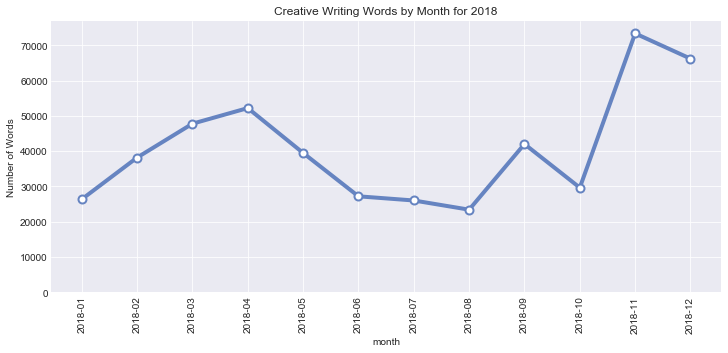

In [22]:
dataset = monthly_counts
chart_title = 'Creative Writing Words by Month for ' + str(target_year)

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
max = dataset.max() + (dataset.max()*0.05)
ax.set_ylim(0, max)
ax.set_xticks(index)
ax.set_ylabel('Number of Words')
# ax.set_xlabel('')
plt.xticks(index, dataset.index, rotation=90)
ax.set_title(chart_title)

plt.show()

### Date

In [23]:
daily_counts = data.groupby(['date'])['count'].sum()
daily_counts = daily_counts.to_frame().reset_index()
daily_counts['date'] = pd.to_datetime(daily_counts['date'])
daily_counts = daily_counts.set_index('date')

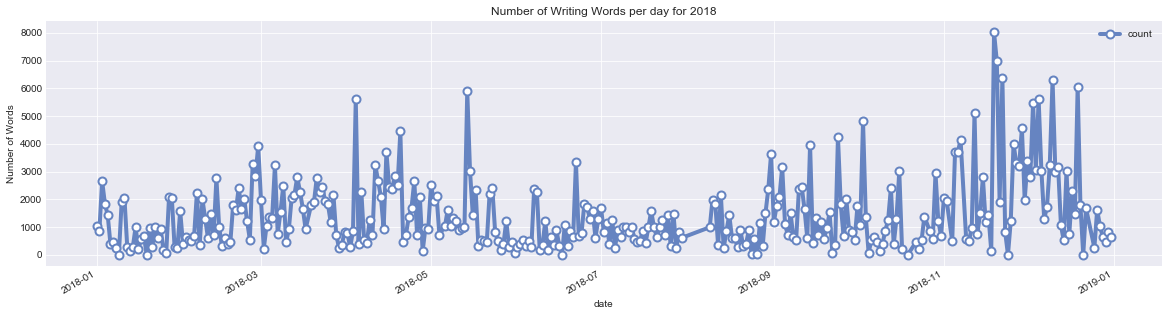

In [24]:
dataset = daily_counts
chart_title = 'Number of Writing Words per day for ' + str(target_year)

ax = dataset.plot(kind='line', figsize=[20, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.set_ylabel('Number of Words')
ax.set_title(chart_title)

plt.show()

### Day of Week

In [25]:
daily_counts = data.groupby(['date'])['count'].sum()
daily_counts = daily_counts.to_frame().reset_index()
daily_counts['date'] = pd.to_datetime(daily_counts['date'])
daily_counts['dow'] = daily_counts['date'].dt.weekday

In [26]:
dow_stats = daily_counts.groupby(['dow'])['count'].mean()

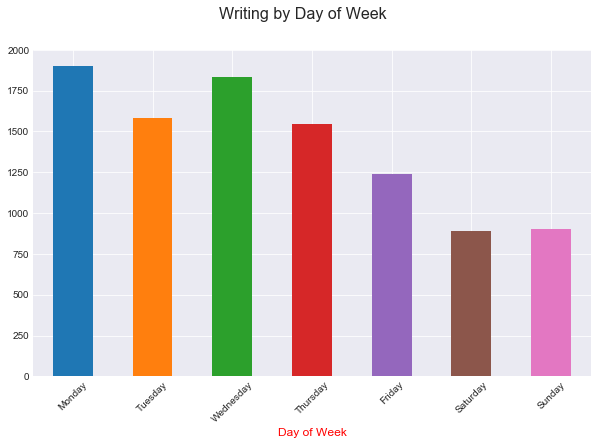

In [27]:
dataset = dow_stats

fig, ax = plt.subplots(figsize=[10, 6])
ax = dataset.plot(kind='bar', x='day_of_week')

n_groups = len(dataset)
index = np.arange(n_groups)
opacity = 0.5

ax.yaxis.grid(True)

plt.suptitle('Writing by Day of Week', fontsize=16)
dow_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(index, dow_labels, rotation=45)
plt.xlabel('Day of Week', fontsize=12, color='red')

### Hour of Day

In [28]:
dates_hourly = data.groupby(['date', 'hour'])['count'].sum()
dates_hourly = dates_hourly.to_frame().reset_index()

In [29]:
hour_counts = round(dates_hourly.groupby(['hour'])['count'].mean(), 1)

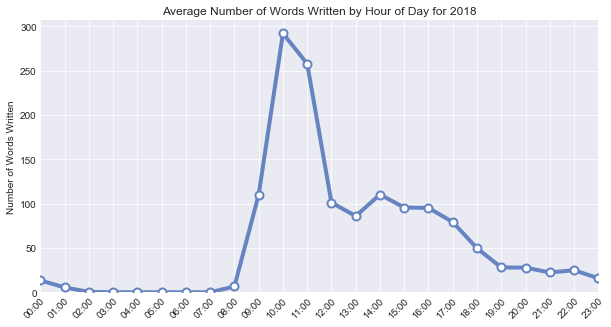

In [30]:
ax = hour_counts.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

xlabels = hour_counts.index.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

ax.set_xlim((hour_counts.index[0], hour_counts.index[-1]))

ax.yaxis.grid(True)
max = hour_counts.max() + (hour_counts.max()*0.05)
ax.set_ylim((0, max))
ax.set_ylabel('Number of Words Written')
ax.set_xlabel('')
ax.set_title('Average Number of Words Written by Hour of Day for ' + str(target_year))

plt.show()

In [31]:
print('====== Written Words Summary for ' + str(target_year) + " ======")

average = round(daily_counts['count'].mean(),1)
print('{:,} average number of written words per day'.format(average))

dow_stats = dow_stats.to_frame().reset_index()
max_dow = dow_stats[dow_stats['count'] == dow_stats['count'].max()]
print('Most productive writing day is on {} with {:,} words'.format(max_dow.iloc[0]['dow'], max_dow.iloc[0]['count']))

max_day = daily_counts[daily_counts['count'] == daily_counts['count'].max()]
print('Max Day on {:} with {:,} words'.format(max_day.iloc[0]['date'], max_day.iloc[0]['count']))

====== Written Words Summary for 2018 ======
1,421.8 average number of written words per day
Most productive writing day is on 0.0 with 1,902.549019607843 words
Max Day on 2018-11-19 00:00:00 with 8,021 words
